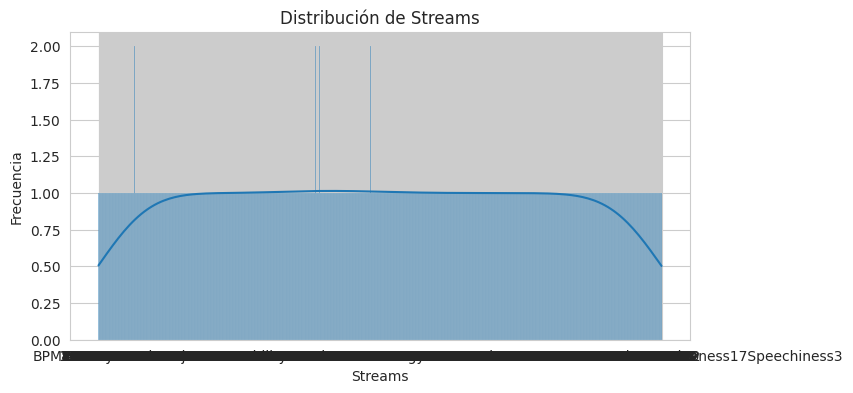

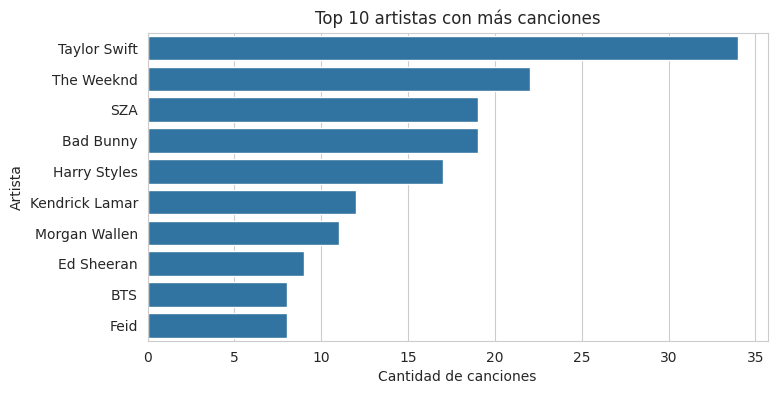

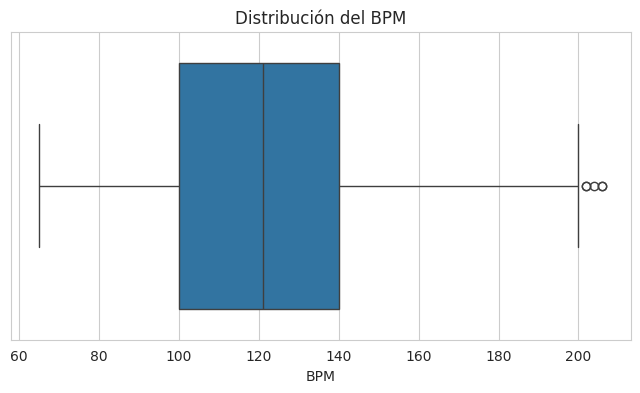

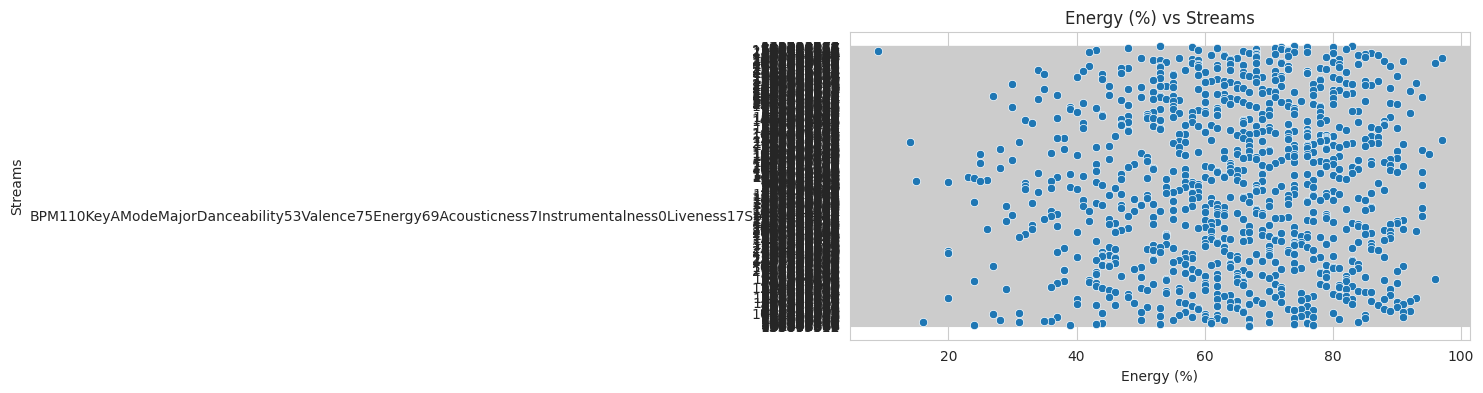

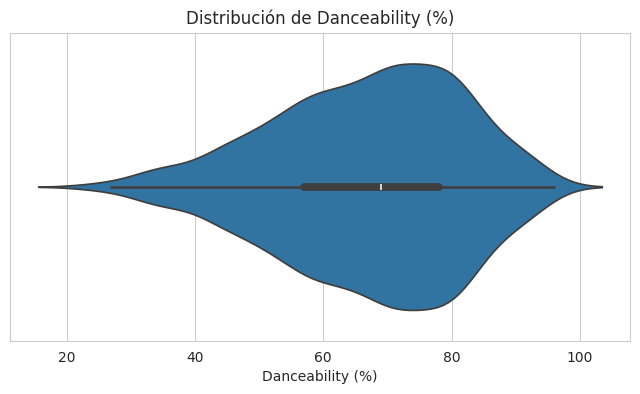

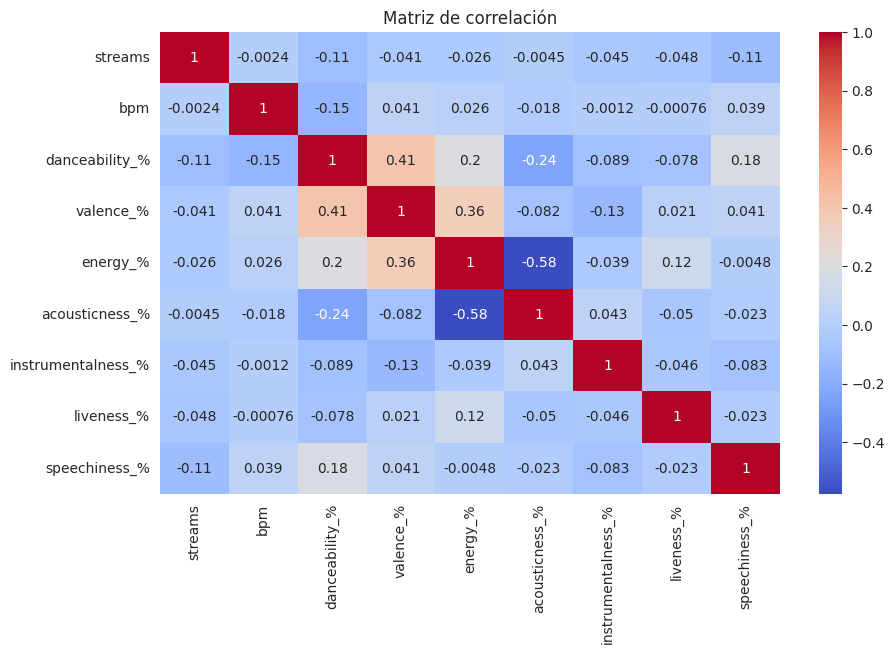

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Popular_Spotify_Songs.csv", encoding='latin1')

# Estilo básico
sns.set_style("whitegrid")

# Gráfico 1:
#    Distribución de Streams
# ============================
plt.figure(figsize=(8,4))
sns.histplot(df["streams"], kde=True)
plt.title("Distribución de Streams")
plt.xlabel("Streams")
plt.ylabel("Frecuencia")
plt.show()

# Gráfico 2:
#    Top artistas con más canciones
# ============================
top_artists = df["artist(s)_name"].value_counts().head(10)

plt.figure(figsize=(8,4))
sns.barplot(y=top_artists.index, x=top_artists.values)
plt.title("Top 10 artistas con más canciones")
plt.xlabel("Cantidad de canciones")
plt.ylabel("Artista")
plt.show()

# Gráfico 3:
#    Boxplot de BPM
# ============================
plt.figure(figsize=(8,4))
sns.boxplot(x=df["bpm"])
plt.title("Distribución del BPM")
plt.xlabel("BPM")
plt.show()

# Gráfico 4:
#    Relación Energy vs Streams
# ============================
plt.figure(figsize=(8,4))
sns.scatterplot(x=df["energy_%"] , y=df["streams"])
plt.title("Energy (%) vs Streams")
plt.xlabel("Energy (%)")
plt.ylabel("Streams")
plt.show()

# Gráfico 5:
#    Violinplot de Danceability
# ============================
plt.figure(figsize=(8,4))
sns.violinplot(x=df["danceability_%"])
plt.title("Distribución de Danceability (%)")
plt.xlabel("Danceability (%)")
plt.show()

# Gráfico 6:
#    Heatmap de correlación
# ============================
# Solo tomamos columnas numéricas
numeric_cols = [
    "streams", "bpm", "danceability_%", "valence_%", "energy_%",
    "acousticness_%", "instrumentalness_%", "liveness_%", "speechiness_%"
]

# Convertir las columnas a numéricas, forzando los errores a NaN
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

corr = df[numeric_cols].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()